In [1]:
import pandas as pd
import plotly.graph_objects as go
import ta
import plotly.express as px
import pandas_ta as ta


# DATA CLEANING

In [2]:
# Data BCTC
bc18 = pd.read_excel("2018-Vietnam.xlsx", skiprows=7,header=1)
bc19 = pd.read_excel("2019-Vietnam.xlsx", skiprows=7,header=1)
bc20 = pd.read_excel("2020-Vietnam.xlsx", skiprows=7,header=1)
bc21 = pd.read_excel("2021-Vietnam.xlsx", skiprows=7,header=1)
bc22 = pd.read_excel("2022-Vietnam.xlsx", skiprows=7,header=1)

In [3]:
bc18_1 = bc18.copy()
bc19_1 = bc19.copy()
bc20_1 = bc20.copy()
bc21_1 = bc21.copy()
bc22_1 = bc22.copy()

In [4]:
ng18 = bc18.copy()
ng19 = bc19.copy()
ng20 = bc20.copy()
ng21 = bc21.copy()
ng22 = bc22.copy()

# BCTC NGÀNH

In [5]:
def data(dt, year):
    dt = dt.iloc[:, 1:]
    bank = dt[dt['Ngành ICB - cấp 4'] == 'Xây dựng']
    bank.index = [year] * len(bank)
    bank.reset_index(inplace=True)
    bank.rename(columns={'index': 'Year'}, inplace=True)
    for i in range(len(bank.columns)):
        quarter_info = f"\nHợp nhất\nQuý: Hàng năm\nNăm: {year}\n"
        if quarter_info in bank.columns[i]:
            bank.columns = bank.columns.str.replace(quarter_info, " ")
    return bank
N18 = data(ng18, 2018)
N19 = data(ng19, 2019)
N20 = data(ng20, 2020)
N21 = data(ng21, 2021)
N22 = data(ng22, 2022)
bank_bctc = pd.concat([N18,N19,N20,N21,N22])

C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_24740\1680765408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.rename(columns={'index': 'Year'}, inplace=True)
C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_24740\1680765408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank.rename(columns={'index': 'Year'}, inplace=True)
C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_24740\1680765408.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

In [6]:
def cat_ten(bank_bctc):
    for column in bank_bctc.columns:
        index_hn = column.find("Đơn vị")
        if index_hn != -1:
            colum = column[:index_hn].strip()
            bank_bctc.rename(columns={column: colum}, inplace=True)
cat_ten(bank_bctc)
bank_bctc.columns = bank_bctc.columns.str.upper()
bank_bctc.sort_values(by=["MÃ", "YEAR"], inplace=True)



In [7]:
bank_bctc['KQKD. DOANH THU THUẦN'] = pd.to_numeric(bank_bctc['KQKD. DOANH THU THUẦN'], errors='coerce')
# Nhóm theo 'MÃ' và tính giá trị doanh thu trung bình của các cổ phiếu
avg_dt = bank_bctc.groupby('MÃ')['KQKD. DOANH THU THUẦN'].mean()
# Lấy top 10 doanh nghiệp có giá trị trung bình lớn nhất
top_10_VCG = avg_dt.nlargest(10)
# Lấy top 10 doanh nghiệp có giá trị trung bình lớn nhất
xaydung = bank_bctc[bank_bctc['MÃ'].isin(top_10_VCG.index)]

In [8]:
# Đảm bảo cột 'CĐKT. VỐN CHỦ SỞ HỮU' có định dạng số học
bank_bctc['CĐKT. VỐN CHỦ SỞ HỮU'] = pd.to_numeric(bank_bctc['CĐKT. VỐN CHỦ SỞ HỮU'], errors='coerce')
# Nhóm theo 'MÃ' và tính giá trị trung bình
avg_von = bank_bctc.groupby('MÃ')['CĐKT. VỐN CHỦ SỞ HỮU'].mean()
# Lấy top 10 ngân hàng có giá trị trung bình lớn nhất
top_10 = avg_von.nlargest(10)
# Lọc các ngân hàng trong DataFrame theo top 10
vcsh = bank_bctc[bank_bctc['MÃ'].isin(top_10.index)]


In [9]:
bank_bctc['KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP'] = pd.to_numeric(bank_bctc['KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP'], errors='coerce')
# Nhóm theo 'MÃ' và tính giá trị trung bình
avg_ln = bank_bctc.groupby('MÃ')['KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP'].mean()
# Lấy top 10 ngân hàng có giá trị trung bình lớn nhất
top_10 = avg_ln.nlargest(10)
# Lọc các ngân hàng trong DataFrame theo top 10
ln = bank_bctc[bank_bctc['MÃ'].isin(top_10.index)]


In [10]:
nganh_dt = xaydung.copy()

In [11]:
nganh_vsch = vcsh.copy()

In [12]:
nganh_ln = ln.copy()

# BCTC VCG

In [13]:
def load_data(df, year):
    df = df.iloc[:, 1:]
    vcg = df[df['Mã'].str.contains('VCG', case=False, na=False)]
    vcg.index = [year] * len(vcg)
    vcg.reset_index(inplace=True)
    vcg.rename(columns={'index': 'Year'}, inplace=True)
    for i in range(len(vcg.columns)):
        quarter_info = f"\nHợp nhất\nQuý: Hàng năm\nNăm: {year}\n"
        if quarter_info in vcg.columns[i]:
            vcg.columns = vcg.columns.str.replace(quarter_info, " ")
    return vcg

vcg18 = load_data(bc18_1, 2018)
vcg19 = load_data(bc19_1, 2019)
vcg20 = load_data(bc20_1, 2020)
vcg21 = load_data(bc21_1, 2021)
vcg22 = load_data(bc22_1, 2022)

C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_24740\903023509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vcg.rename(columns={'index': 'Year'}, inplace=True)
C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_24740\903023509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vcg.rename(columns={'index': 'Year'}, inplace=True)
C:\Users\MY LAPTOP\AppData\Local\Temp\ipykernel_24740\903023509.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ver

In [14]:
bctc = pd.concat([vcg18,vcg19,vcg20,vcg21,vcg22])

def cat_ten(bctc):
    for column in bctc.columns:
        index_hn = column.find("Đơn vị")
        if index_hn != -1:
            cot_moi = column[:index_hn].strip()
            bctc.rename(columns={column: cot_moi}, inplace=True)
cat_ten(bctc)
bctc.columns = bctc.columns.str.upper()
excel_fi = 'vcg.xlsx'
bctc.to_excel(excel_fi, index=False)

In [15]:
bctc.head()

YEAR   MÃ TÊN CÔNG TY   SÀN NGÀNH ICB - CẤP 1     NGÀNH ICB - CẤP 2  \
0  2018  VCG   VINACONEX  HOSE       Công nghiệp  Xây dựng và Vật liệu   
0  2019  VCG   VINACONEX  HOSE       Công nghiệp  Xây dựng và Vật liệu   
0  2020  VCG   VINACONEX  HOSE       Công nghiệp  Xây dựng và Vật liệu   
0  2021  VCG   VINACONEX  HOSE       Công nghiệp  Xây dựng và Vật liệu   
0  2022  VCG   VINACONEX  HOSE       Công nghiệp  Xây dựng và Vật liệu   

      NGÀNH ICB - CẤP 3 NGÀNH ICB - CẤP 4  QUÝ     NĂM   ...  \
0  Xây dựng và Vật liệu          Xây dựng   5.0  2018.0  ...   
0  Xây dựng và Vật liệu          Xây dựng   5.0  2019.0  ...   
0  Xây dựng và Vật liệu          Xây dựng   5.0  2020.0  ...   
0  Xây dựng và Vật liệu          Xây dựng   5.0  2021.0  ...   
0  Xây dựng và Vật liệu          Xây dựng   5.0  2022.0  ...   

  TM. CHI PHÍ TÀI CHÍNH KHÁC  TM. CHI PHÍ SẢN XUẤT THEO YẾU TỐ  \
0               1.054884e+10                      8.912921e+12   
0               1.485279e+10                      8.703120e+12   
0               8.680913e+09                      5.785538e+12   
0               3.789428e+09                      6.294184e+12   
0               8.602948e+09                      3.951087e+12   

   TM. CHI PHÍ NGUYÊN LIỆU, VẬT LIỆU  TM. CHI PHÍ NHÂN CÔNG  \
0                       3.729421e+12           1.671430e+12   
0                       3.206401e+12           1.634445e+12   
0                       1.724342e+12           8.933585e+11   
0                       1.896647e+12           9.826276e+11   
0                       1.340896e+12           3.374719e+11   

   TM.CHI PHÍ KHẤU HAO TÀI SẢN CỐ ĐỊNH  TM. CHI PHÍ DỊCH VỤ MUA NGOÀI  \
0                         2.543020e+11                   1.851780e+12   
0                         3.113121e+11                   2.463145e+12   
0                         2.524161e+11                   8.041185e+11   
0                         2.558617e+11                   1.740463e+12   
0                         1.322363e+11                   1.024293e+12   

   TM. CHI PHÍ KHÁC BẰNG TIỀN  BCTCKH. DOANH THU KẾ HOẠCH  \
0                1.405988e+12                3.600000e+12   
0                1.087816e+12                9.530000e+12   
0                2.111303e+12                1.223000e+13   
0                1.418584e+12                1.530000e+13   
0                1.116190e+12                1.634000e+13   

   BCTCKH. TỔNG LỢI NHUẬN KẾ TOÁN TRƯỚC THUẾ  \
0                               8.125000e+11   
0                               1.025000e+12   
0                               1.260000e+12   
0                               1.750000e+12   
0                               1.075000e+12   

   BCTCKH. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP  
0                                      6.500000e+11  
0                                      8.200000e+11  
0                                      1.008000e+12  
0                                      1.400000e+12  
0                                      8.600000e+11  

[5 rows x 168 columns]

In [16]:
# Khởi tạo các DataFrame mới
cdkts = []
kqkds = []
lctts = []

In [17]:
# Lọc cột chứa thông tin CĐKT 
columns_cdkt = bctc.filter(like='CĐKT.').columns
df_cdkt = bctc[['MÃ', 'YEAR'] + list(columns_cdkt)]
cdkts.append(df_cdkt)

In [18]:
#CĐKT
cdkto_all = pd.concat(cdkts)
cdkto_all

MÃ  YEAR  CĐKT. TÀI SẢN NGẮN HẠN  CĐKT. TIỀN VÀ TƯƠNG ĐƯƠNG TIỀN  \
0  VCG  2018            1.236978e+13                    1.353547e+12   
0  VCG  2019            1.205509e+13                    1.342791e+12   
0  VCG  2020            1.339731e+13                    1.995310e+12   
0  VCG  2021            2.129618e+13                    2.812003e+12   
0  VCG  2022            1.997452e+13                    1.710245e+12   

   CĐKT. ĐẦU TƯ TÀI CHÍNH NGẮN HẠN  CĐKT. CÁC KHOẢN PHẢI THU NGẮN HẠN  \
0                     1.590582e+12                       5.845864e+12   
0                     9.591579e+11                       7.303395e+12   
0                     1.551143e+12                       7.468437e+12   
0                     3.870239e+12                       1.085624e+13   
0                     1.616188e+12                       9.059045e+12   

   CĐKT. HÀNG TỒN KHO, RÒNG  CĐKT. TÀI SẢN NGẮN HẠN KHÁC  \
0              3.435007e+12                 1.447843e+11   
0              2.321342e+12                 1.284090e+11   
0              2.220137e+12                 1.622849e+11   
0              3.466163e+12                 2.915322e+11   
0              7.080334e+12                 5.087060e+11   

   CĐKT. TÀI SẢN DÀI HẠN  CĐKT. PHẢI THU DÀI HẠN  ...  \
0           7.715402e+12            8.955873e+11  ...   
0           7.263276e+12            5.879992e+11  ...   
0           6.212668e+12            2.098339e+11  ...   
0           9.673237e+12            2.380239e+12  ...   
0           1.202479e+13            1.717587e+11  ...   

   CĐKT. VỐN GÓP CỦA CHỦ SỞ HỮU  CĐKT. THẶNG DƯ VỐN CỔ PHẦN  CĐKT.VỐN KHÁC  \
0                  4.417107e+12                3.551049e+11   5.210409e+10   
0                  4.417107e+12                3.551049e+11   5.899666e+10   
0                  4.417107e+12                3.551049e+11   7.435291e+10   
0                  4.417107e+12                1.628233e+10   1.559529e+11   
0                  4.858799e+12                1.628233e+10   1.604284e+11   

   CĐKT. LÃI CHƯA PHÂN PHỐI  \
0              7.902656e+11   
0              9.475370e+11   
0              2.156621e+12   
0              1.838002e+12   
0              1.683378e+12   

   CĐKT. LNST CHƯA PHÂN PHỐI LŨY KẾ ĐẾN CUỐI KỲ TRƯỚC  \
0                                       2.995723e+11    
0                                       1.625489e+11    
0                                       5.519508e+11    
0                                       1.389564e+12    
0                                       9.026655e+11    

   CĐKT. LNST CHƯA PHÂN PHỐI KỲ NÀY  CĐKT. LỢI ÍCH CỔ ĐÔNG KHÔNG KIỂM SOÁT  \
0                      4.906933e+11                           1.206421e+12   
0                      7.849881e+11                           9.426121e+11   
0                      1.604670e+12                           8.009334e+11   
0                      4.484378e+11                           1.007630e+12   
0                      7.807128e+11                           3.074549e+12   

   CĐKT. NGUỒN KINH PHÍ VÀ QUỸ KHÁC  \
0                      1.072047e+11   
0                      1.079145e+11   
0                      1.106330e+11   
0                      1.008629e+11   
0                      9.702772e+10   

   CĐKT. LỢI ÍCH CỦA CỔ ĐÔNG KHÔNG KIỂM SOÁT (TRƯỚC 2015)  \
0                                                0.0        
0                                                0.0        
0                                                0.0        
0                                                0.0        
0                                                0.0        

   CĐKT. TỔNG CỘNG NGUỒN VỐN  
0               2.008519e+13  
0               1.931837e+13  
0               1.960998e+13  
0               3.096942e+13  
0               3.199930e+13  

[5 rows x 45 columns]

In [19]:
# Lọc cột chứa thông tin KQDK
columns_kqkd = bctc.filter(like='KQKD.').columns
df_kqkd = bctc[['MÃ', 'YEAR'] + list(columns_kqkd)]
kqkds.append(df_kqkd)

In [20]:
#BCKQKD
kqkd_all = pd.concat(kqkds)
kqkd_all

MÃ  YEAR  KQKD. DOANH THU BÁN HÀNG VÀ CUNG CẤP DỊCH VỤ  \
0  VCG  2018                                  9.731057e+12   
0  VCG  2019                                  9.508206e+12   
0  VCG  2020                                  5.551586e+12   
0  VCG  2021                                  5.750688e+12   
0  VCG  2022                                  8.452905e+12   

   KQKD. DOANH THU THUẦN  KQKD. LỢI NHUẬN GỘP VỀ BÁN HÀNG VÀ CUNG CẤP DỊCH VỤ  \
0           9.730997e+12                                       1.210026e+12     
0           9.502313e+12                                       1.310867e+12     
0           5.551436e+12                                       8.363239e+11     
0           5.749000e+12                                       8.294371e+11     
0           8.452855e+12                                       9.169910e+11     

   KQKD. DOANH THU HOẠT ĐỘNG TÀI CHÍNH  KQKD. CHI PHÍ TÀI CHÍNH  \
0                         2.594605e+11            -2.936491e+11   
0                         2.499044e+11            -3.130014e+11   
0                         3.045771e+12            -2.771248e+11   
0                         5.271764e+11            -4.989240e+11   
0                         1.079832e+12            -7.650959e+11   

   KQKD. TRONG ĐÓ: CHI PHÍ LÃI VAY  KQKD. LÃI/LỖ TỪ CÔNG TY LIÊN DOANH  \
0                    -2.735015e+11                        8.953688e+10   
0                    -2.674527e+11                        1.411752e+11   
0                    -2.553574e+11                        6.507462e+09   
0                    -5.055687e+11                        2.341460e+10   
0                    -7.571089e+11                       -2.741258e+10   

   KQKD. CHI PHÍ BÁN HÀNG  KQKD. CHI PHÍ QUẢN LÝ DOANH  NGHIỆP  \
0           -7.557115e+10                        -4.451209e+11   
0           -8.037409e+10                        -4.449715e+11   
0           -6.151926e+10                        -1.506270e+12   
0           -3.626551e+10                        -1.379604e+11   
0           -5.747439e+10                        -2.227578e+11   

   KQKD. LỢI NHUẬN THUẦN TỪ HOẠT ĐỘNG KINH DOANH  KQKD. LỢI NHUẬN KHÁC  \
0                                   7.446825e+11          4.812517e+10   
0                                   8.636001e+11          1.016636e+11   
0                                   2.043689e+12          8.310983e+10   
0                                   7.068782e+11          1.206747e+10   
0                                   9.240823e+11          6.127616e+10   

   KQKD. LÃI/ LỖ TỪ CÔNG TY LIÊN DOANH (TRƯỚC 2015)  \
0                                               0.0   
0                                               0.0   
0                                               0.0   
0                                               0.0   
0                                               0.0   

   KQKD. TỔNG LỢI NHUẬN KẾ TOÁN TRƯỚC THUẾ  \
0                             7.928076e+11   
0                             9.652637e+11   
0                             2.126799e+12   
0                             7.189457e+11   
0                             9.853584e+11   

   KQKD. CHI PHÍ THUẾ THU NHẬP DOANH NGHIỆP  \
0                             -1.560627e+11   
0                             -1.786327e+11   
0                             -4.364830e+11   
0                             -1.990200e+11   
0                             -5.460042e+10   

   KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP  \
0                                    6.367449e+11   
0                                    7.866310e+11   
0                                    1.690316e+12   
0                                    5.199257e+11   
0                                    9.307580e+11   

   KQKD. LỢI ÍCH CỦA CỔ ĐÔNG THIỂU SỐ  KQKD. CỔ ĐÔNG CỦA CÔNG TY MẸ  \
0                        1.454866e+11                  4.912582e+11   
0                        1.030510e+11                  6.835800e+11   
0                        8.5645

In [21]:
# Lọc cột chứa thông tin Lưu chuyển tiền tệ.
columns_lctt = bctc.filter(like='LCTT.').columns
df_lctt = bctc[['MÃ', 'YEAR'] + list(columns_lctt)]
lctts.append(df_lctt)

In [22]:
#LCTT
lctt_all = pd.concat(lctts)
lctt_all

MÃ  YEAR  LCTT. LÃI TRƯỚC THUẾ  LCTT. KHẤU HAO TSCĐ  \
0  VCG  2018          7.928076e+11         2.588966e+11   
0  VCG  2019          9.652637e+11         3.113121e+11   
0  VCG  2020          2.126799e+12         2.524161e+11   
0  VCG  2021          7.189457e+11         2.558617e+11   
0  VCG  2022          9.853584e+11         2.757415e+11   

   LCTT. LÃI/(LỖ) TRƯỚC NHỮNG THAY ĐỔI VỐN LƯU ĐỘNG  \
0                                      9.486193e+11   
0                                      1.165566e+12   
0                                      7.461008e+11   
0                                      7.258831e+11   
0                                      7.274776e+11   

   LCTT. LƯU CHUYỂN TIỀN TỆ RÒNG TỪ CÁC HOẠT ĐỘNG SẢN XUẤT KINH DOANH (TT)  \
0                                      -5.008244e+10                         
0                                      -1.493163e+12                         
0                                      -2.521100e+10                         
0                                       3.944124e+11                         
0                                      -1.766725e+12                         

   LCTT. TIỀN CHI ĐỂ MUA SẮM, XÂY DỰNG TSCĐ VÀ CÁC TÀI SẢN DÀI HẠN KHÁC (TT)  \
0                                      -3.183336e+11                           
0                                      -3.804263e+11                           
0                                      -2.045259e+11                           
0                                      -1.406506e+12                           
0                                      -1.458845e+12                           

   LCTT. TIỀN THU TỪ THANH LÝ, NHƯỢNG BÁN TSCĐ VÀ CÁC TÀI SẢN DÀI HẠN KHÁC (TT)  \
0                                       1.529415e+10                              
0                                       3.413111e+10                              
0                                       7.632496e+10                              
0                                       1.368045e+10                              
0                                       3.069306e+11                              

   LCTT. TIỀN CHI CHO VAY, MUA CÁC CÔNG CỤ NỢ CỦA ĐỢN VỊ KHÁC (TT)  \
0                                      -1.529525e+12                 
0                                      -1.124174e+12                 
0                                      -1.596714e+12                 
0                                      -5.461870e+12                 
0                                      -5.713739e+12                 

   LCTT. TIỀN THU HỒI CHO VAY, BÁN LẠI CÁC CÔNG CỤ NỢ CỦA ĐƠN VỊ KHÁC (TT)  \
0                                       1.884293e+12                         
0                                       1.573768e+12                         
0                                       1.435598e+12                         
0                                       2.737443e+12                         
0                                       7.952228e+12                         

   ...  LCTT. TIỀN THU ĐƯỢC CÁC KHOẢN ĐI VAY (TT)  \
0  ...                               5.020917e+12   
0  ...                               7.496064e+12   
0  ...                               3.921449e+12   
0  ...                               1.303500e+13   
0  ...                               1.009649e+13   

   LCTT. TIỀN TRẢ NỢ GỐC VAY (TT)  \
0                   -5.433084e+12   
0                   -5.826377e+12   
0                   -4.286273e+12   
0                   -5.582130e+12   
0                   -1.066099e+13   

   LCTT. TIỀN THANH TOÁN VỐN GỐC ĐI THUÊ TÀI CHÍNH (TT)  \
0                                      -2.912815e+09      
0                                      -2.361188e+09      
0                                      -1.904067e+10      
0                                      -6.231722e+09      
0                                      -1.664591e+10      

   LCTT. CỔ TỨC ĐÃ TRẢ (TT)  \
0             -7.221699e+11   
0             -5.256

# Bảng giá cổ phiếu

In [23]:
data = pd.read_excel("Price-Vol VN 2015-2023.xlsx", sheet_name=["Price", "Volume"])
price_data = data["Price"]
volume_data = data["Volume"]

In [24]:
P = price_data.copy()
V = P['Code'].str.contains('VCG', na=False)
vcg_price = P[V]
vcg = vcg_price.transpose()
vcg_price = vcg.iloc[3:]
vcg_price.columns = ['close']
vcg_price = vcg_price.reset_index()
vcg_price = vcg_price.rename(columns={'index': 'Date'})
vcg_price

Date    close
0    2015-01-01  9629.23
1    2015-01-02  9629.23
2    2015-01-05  9401.77
3    2015-01-06   9856.7
4    2015-01-07  9705.05
...         ...      ...
2303 2023-10-31  19000.0
2304 2023-11-01  19750.0
2305 2023-11-02  21100.0
2306 2023-11-03  21650.0
2307 2023-11-06  21950.0

[2308 rows x 2 columns]

In [25]:
Volume = volume_data.copy()
Volume_tcb = Volume['Code'].str.contains('VCG', na=False)
vcg_volume = Volume[Volume_tcb]
vcg_kl = vcg_volume.transpose()
vcg_vol = vcg_kl.iloc[3:]
vcg_vol.columns = ['volume']
vcg_vol = vcg_vol .reset_index()
vcg_vol = vcg_vol .rename(columns={'index': 'Date'})
vcg_vol


Date   volume
0    2015-01-01      NaN
1    2015-01-02      NaN
2    2015-01-05    886.4
3    2015-01-06   1822.9
4    2015-01-07   1802.4
...         ...      ...
2303 2023-10-31   9236.2
2304 2023-11-01   6617.8
2305 2023-11-02   8391.0
2306 2023-11-03  11373.1
2307 2023-11-06   7497.9

[2308 rows x 2 columns]

In [26]:
cp_gia = pd.merge(vcg_price, vcg_vol, on='Date', how='outer')
#gia.set_index('Date', inplace=True)

In [27]:
cp_gia

Date    close   volume
0    2015-01-01  9629.23      NaN
1    2015-01-02  9629.23      NaN
2    2015-01-05  9401.77    886.4
3    2015-01-06   9856.7   1822.9
4    2015-01-07  9705.05   1802.4
...         ...      ...      ...
2303 2023-10-31  19000.0   9236.2
2304 2023-11-01  19750.0   6617.8
2305 2023-11-02  21100.0   8391.0
2306 2023-11-03  21650.0  11373.1
2307 2023-11-06  21950.0   7497.9

[2308 rows x 3 columns]

# A.PHÂN TÍCH CHI TIẾT CỔ PHIẾU VCG

In [28]:
chi_so_tai_chinh = pd.read_excel("VCG_CSTC.xlsx",header=0)
columns = chi_so_tai_chinh.columns.tolist()
columns[0] = 'year'
chi_so_tai_chinh.columns = columns
cstc = chi_so_tai_chinh.transpose()
cstc.dropna(axis=1, inplace=True)
tieu_de = cstc.iloc[0]
cstc.columns = tieu_de
cstc = cstc.iloc[1:]
cstc.columns.name = None  # Loại bỏ tên cột không mong muốn
cstc.reset_index(inplace=True)  # Chuyển tên index thành cột mới
cstc.columns.name = None  # Loại bỏ tên cột không mong muốn
cstc.columns = ['year'] + cstc.columns[1:].tolist()  # Đặt lại tên cột đầu tiên thành 'year'

In [29]:
cstc.columns = ['year'] + cstc.columns[1:].tolist()  # Đặt lại tên cột đầu tiên thành 'year'
cstc = chi_so_tai_chinh.set_index('year').transpose().reset_index()
# Loại bỏ các cột chứa NaN
cstc = cstc.dropna(axis=1)
# Xoá cột có tên là 'index' và đổi tên cột 'Chỉ số tài chính - MCH' thành 'Quý'
cstc = cstc.rename(columns={'Chỉ số tài chính - VCG': 'Năm'}).drop(columns=['index'])
cstc = cstc.rename_axis(None, axis=1)

In [30]:
# Chuyển đổi cột "Năm" sang dạng int
cstc['Năm'] = cstc['Năm'].astype(int)
cstc

Năm  Thu nhập trên mỗi cổ phần của 4 quý gần nhất (EPS)  \
0  2019                                            1547.57    
1  2020                                            3645.99    
2  2021                                             895.37    
3  2022                                            1686.36    

   Giá trị sổ sách của cổ phiếu (BVPS)  \
0                             17274.67   
1                              15966.5   
2                             17040.03   
3                             20238.81   

   Chỉ số giá thị trường trên thu nhập (P/E)  \
0                                      17.38   
1                                      12.64   
2                                      57.74   
3                                      10.23   

   Chỉ số giá thị trường trên giá trị sổ sách (P/B)  \
0                                              1.56   
1                                              2.89   
2                                              3.03   
3                                              0.85   

   Chỉ số giá thị trường trên doanh thu thuần (P/S)  Tỷ suất cổ tức  Beta  \
0                                              1.25             4.0  1.16   
1                                              3.67               0  0.43   
2                                              3.97             5.0  0.15   
3                                              0.99             7.0  1.29   

   Giá trị doanh nghiệp trên lợi nhuận trước thuế và lãi vay (EV/EBIT)  \
0                                               13.1                     
1                                               9.85                     
2                                              26.71                     
3                                              13.35                     

   Giá trị doanh nghiệp trên lợi nhuận trước thuế, khấu hao và lãi vay (EV/EBITDA)  \
0                                              10.46                                 
1                                                8.9                                 
2                                               22.1                                 
3                                              11.52                                 

   ...  Đầu tư tài chính ngắn hạn/Tài sản ngắn hạn  \
0  ...                                        7.96   
1  ...                                       11.58   
2  ...                                       18.17   
3  ...                                        8.09   

   Phải thu ngắn hạn/Tài sản ngắn hạn  Hàng tồn kho/Tài sản ngắn hạn  \
0                               60.58                          19.26   
1                               55.75                          16.57   
2                               50.98                          16.28   
3                               45.35                          35.45   

   Tài sản ngắn hạn khác/Tài sản ngắn hạn  Tài sản dài hạn/Tổng tài sản  \
0                                    1.07                          37.6   
1                                    1.21                         31.68   
2                                    1.37                         31.23   
3                                    2.55                         37.58   

   Tài sản cố định/Tổng tài sản  Tài sản cố định hữu hình/Tài sản cố định  \
0                         12.64                                     98.35   
1                         13.17                                     98.75   
2                          8.28                                     98.49   
3                          8.39                                     94.84   

   Tài sản thuê tài chính/Tài sản cố định  Tài sản vô hình/Tài sản cố định  \
0                                    1.23                             0.42   
1                                    0.94                             0.31   
2                                    1.31                             0.21   
3                                    4.95                         

# 1. Phân tích cơ bản

1.1Cơ cấu nguồn vốn

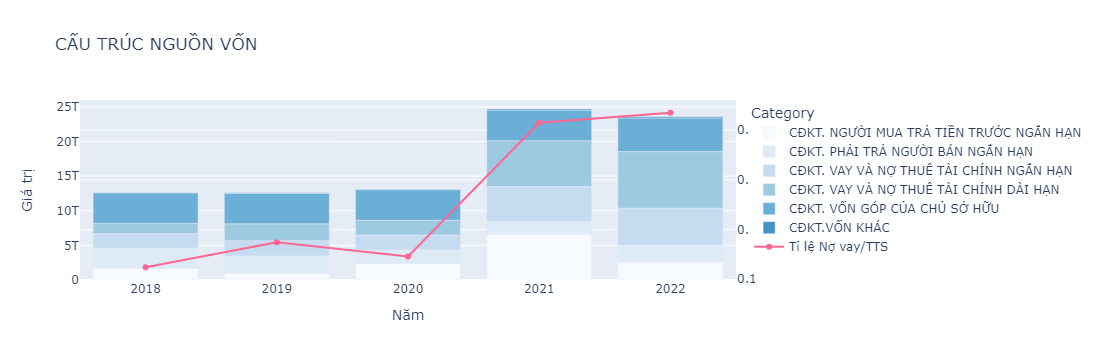

In [31]:
# List of columns to include in the bar chart
columns_to_plot = ['CĐKT. NGƯỜI MUA TRẢ TIỀN TRƯỚC NGẮN HẠN', 'CĐKT. PHẢI TRẢ NGƯỜI BÁN NGẮN HẠN',
                   'CĐKT. VAY VÀ NỢ THUÊ TÀI CHÍNH NGẮN HẠN', 'CĐKT. VAY VÀ NỢ THUÊ TÀI CHÍNH DÀI HẠN',
                   'CĐKT. VỐN GÓP CỦA CHỦ SỞ HỮU', 'CĐKT.VỐN KHÁC']

cdkto_all['Tỷ số Nợ vay trên Tổng tài sản'] = cdkto_all['CĐKT. VAY VÀ NỢ THUÊ TÀI CHÍNH NGẮN HẠN']/cdkto_all['CĐKT. TỔNG CỘNG TÀI SẢN']

# Melt the DataFrame for easier plotting                                                                                                   
bctc_melted = pd.melt(cdkto_all, id_vars=['YEAR'], value_vars=columns_to_plot,
                      var_name='Category', value_name='Value')

# Create the bar chart using Plotly Express with shades of blue
fig = px.bar(bctc_melted, x='YEAR', y='Value', color='Category',
             title='CẤU TRÚC NGUỒN VỐN', labels={'Value': 'Giá trị', 'YEAR': 'Năm'},
             category_orders={"Category": columns_to_plot},
             color_discrete_sequence=px.colors.sequential.Blues)

# Create a scatter plot for 'Tỷ số Nợ vay trên Tổng tài sản' with a secondary y-axis
fig.add_trace(go.Scatter(x=cdkto_all['YEAR'], y=cdkto_all['Tỷ số Nợ vay trên Tổng tài sản'], mode='lines+markers', name='Tỉ lệ Nợ vay/TTS', yaxis='y2'))

# Create a secondary y-axis
fig.update_layout(yaxis2=dict(anchor='x', overlaying='y', side='right'))

# Show the plot
fig.show()

1.2 Cơ cấu tài sản

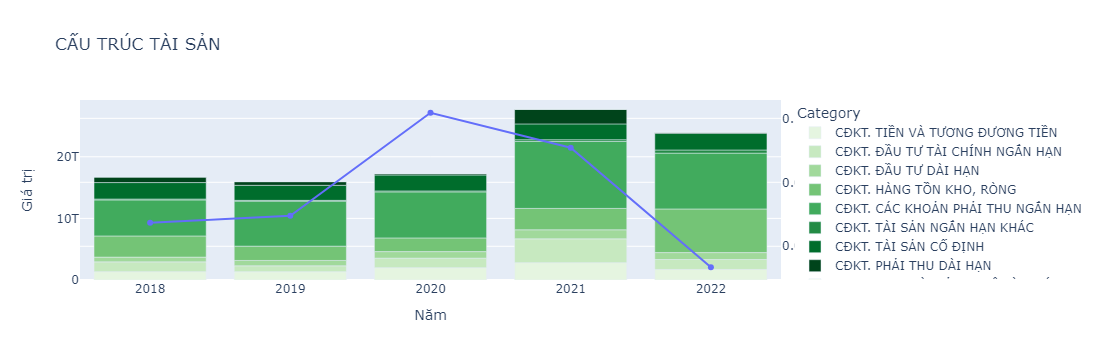

In [32]:
# List of columns to include in the bar chart
columns_to_plot = ['CĐKT. Tiền và tương đương tiền', 'CĐKT. Đầu tư tài chính ngắn hạn',
                   'CĐKT. Đầu tư dài hạn', 'CĐKT. Hàng tồn kho, ròng',
                   'CĐKT. Các khoản phải thu ngắn hạn', 'CĐKT. Tài sản ngắn hạn khác',
                   'CĐKT. Tài sản cố định','CĐKT. Phải thu dài hạn',
                    'CĐKT. GTCL Tài sản thuê tài chính',
                   'CĐKT. GTCL tài sản cố định vô hình']
columns_to_plot_upper = [column.upper() for column in columns_to_plot]

cdkto_all['Tiền/TTS'] = cdkto_all['CĐKT. TIỀN VÀ TƯƠNG ĐƯƠNG TIỀN']/cdkto_all['CĐKT. TỔNG CỘNG TÀI SẢN']

# Melt the DataFrame for easier plotting
bctc_melted = pd.melt(cdkto_all, id_vars=['YEAR'], value_vars=columns_to_plot_upper,
                      var_name='Category', value_name='Value')

# Create the bar chart using Plotly Express with shades of blue
fig = px.bar(bctc_melted, x='YEAR', y='Value', color='Category',
             title='CẤU TRÚC TÀI SẢN', labels={'Value': 'Giá trị', 'YEAR': 'Năm'},
             category_orders={"Category": columns_to_plot},
             color_discrete_sequence=px.colors.sequential.Greens)

# Create a scatter plot for 'Tỷ số Nợ vay trên Tổng tài sản' with a secondary y-axis
fig.add_trace(go.Scatter(x=cdkto_all['YEAR'], y=cdkto_all['Tiền/TTS'], mode='lines+markers', name='Tiền/TTS', yaxis='y2'))

# Create a secondary y-axis
fig.update_layout(yaxis2=dict(anchor='x', overlaying='y', side='right'))

# Show the plot
fig.show()

1.3 Sức khoẻ tài chính

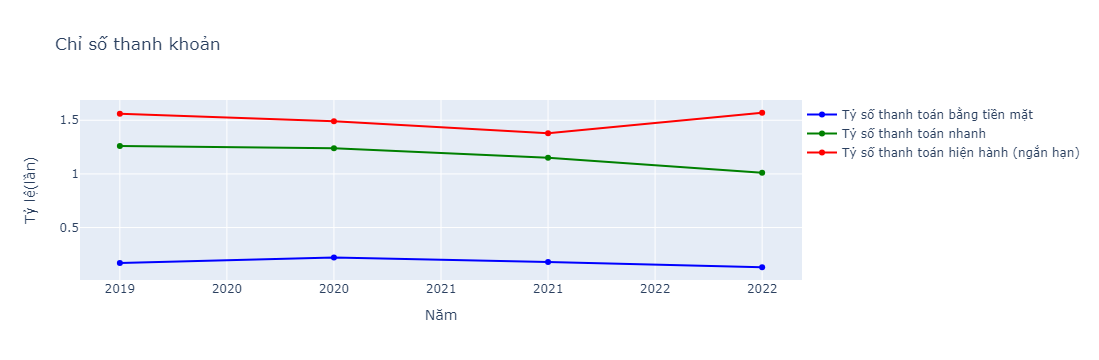

In [33]:
# Chuyển đổi cột "Năm" sang dạng số
cstc['Năm'] = cstc['Năm'].astype(float)

fig = go.Figure()

fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tỷ số thanh toán bằng tiền mặt'], name='Tỷ số thanh toán bằng tiền mặt', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tỷ số thanh toán nhanh'], name='Tỷ số thanh toán nhanh', line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tỷ số thanh toán hiện hành (ngắn hạn)'], name='Tỷ số thanh toán hiện hành (ngắn hạn)', line=dict(color='red', width=2)))

fig.update_layout(
    title='Chỉ số thanh khoản',
    xaxis=dict(title='Năm', tickformat='d'),
    yaxis=dict(title='Tỷ lệ(lần)'),
    legend=dict(x=1, y=1)
)

fig.show()

1.4 Tăng Trưởng

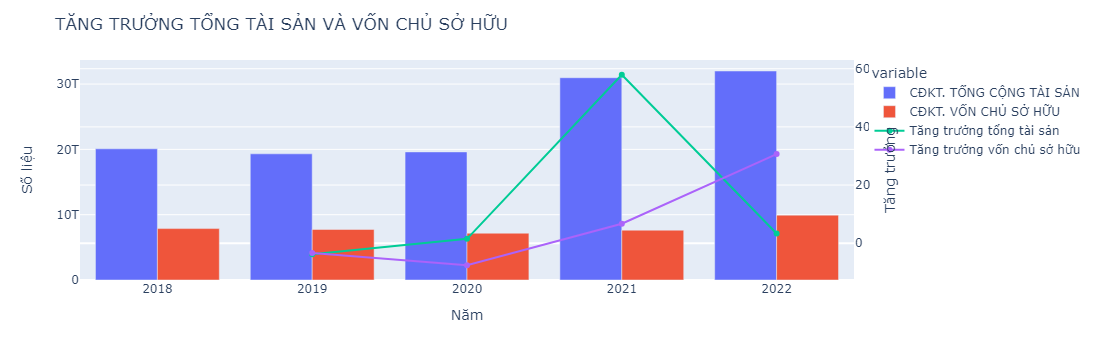

In [34]:
# Tạo biểu đồ cột cho CĐKT
fig = px.bar(cdkto_all, x='YEAR', y=['CĐKT. TỔNG CỘNG TÀI SẢN', 'CĐKT. VỐN CHỦ SỞ HỮU'], barmode='group', labels={'value': 'Số liệu'})

# Thêm đường cho Tăng trưởng tổng tài sản
fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tăng trưởng tổng tài sản'], mode='lines+markers', name='Tăng trưởng tổng tài sản', yaxis='y2'))

# Thêm đường cho Tăng trưởng vốn chủ sở hữu
fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tăng trưởng vốn chủ sở hữu'], mode='lines+markers', name='Tăng trưởng vốn chủ sở hữu', yaxis='y2'))

# Thiết lập trục và tiêu đề
fig.update_layout(
    xaxis=dict(title='Năm'),
    yaxis=dict(title='Số liệu', side='left'),
    yaxis2=dict(title='Tăng trưởng', overlaying='y', side='right'),
    #legend=dict(x=0, y=1.0),
    hovermode='closest',
    title='TĂNG TRƯỞNG TỔNG TÀI SẢN VÀ VỐN CHỦ SỞ HỮU'
)

# Hiển thị biểu đồ
fig.show()


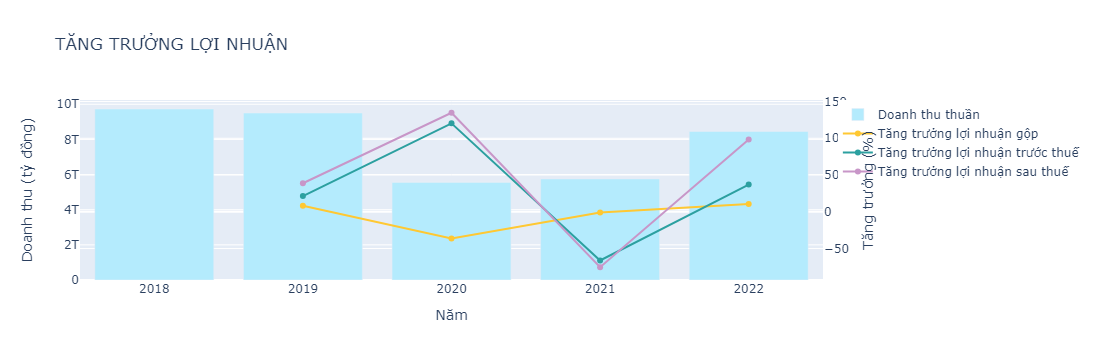

In [35]:
import plotly.graph_objects as go

# Biểu đồ cột cho 'KQKD. DOANH THU THUẦN'
fig = go.Figure()
fig.add_trace(go.Bar(x=kqkd_all['YEAR'], y=kqkd_all['KQKD. DOANH THU THUẦN'], name='Doanh thu thuần', marker=dict(color='rgb(180, 235, 253)')))
fig.update_layout(title='Doanh thu thuần', xaxis=dict(title='Năm'), yaxis=dict(title='Doanh thu (tỷ đồng)'))

# Biểu đồ đường cho 'Tăng trưởng lợi nhuận gộp'
fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tăng trưởng  lợi nhuận gộp'], name='Tăng trưởng lợi nhuận gộp', line=dict(color='rgb(255, 200, 50)', width=2), yaxis='y2'))

# Biểu đồ đường cho 'Tăng trưởng lợi nhuận trước thuế'
fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tăng trưởng lợi nhuận trước thuế '], name='Tăng trưởng lợi nhuận trước thuế', line=dict(color='rgb(44, 160, 160)', width=2), yaxis='y2'))

# Biểu đồ đường cho 'Tăng trưởng lợi nhuận sau thuế của CĐ công ty mẹ'
fig.add_trace(go.Scatter(x=cstc['Năm'], y=cstc[' Tăng trưởng lợi nhuận sau thuế của CĐ công ty mẹ'], name='Tăng trưởng lợi nhuận sau thuế', line=dict(color='rgb(200, 150, 200)', width=2), yaxis='y2'))

fig.update_layout(title='TĂNG TRƯỞNG LỢI NHUẬN', xaxis=dict(title='Năm'), yaxis=dict(title='Doanh thu (tỷ đồng)'), yaxis2=dict(title='Tăng trưởng (%)', overlaying='y', side='right'))
fig.show()

1.5 Khả năng sinh lời 

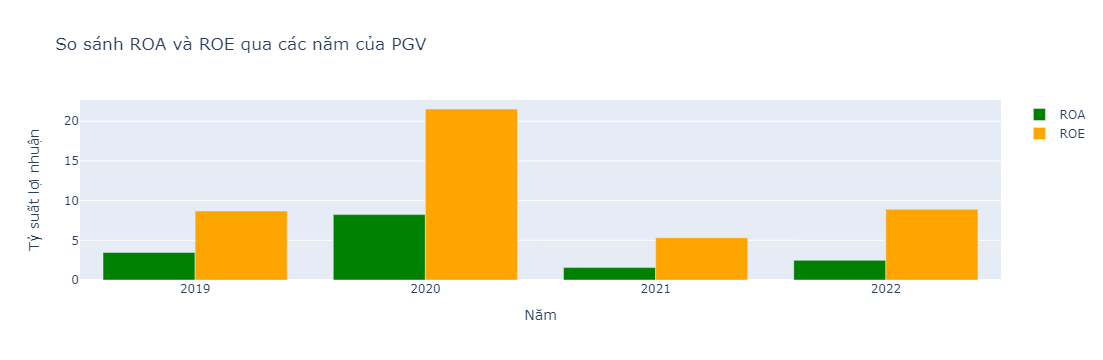

In [36]:
years = cstc['Năm']
roa = cstc[' Tỷ suất sinh lợi trên tổng tài sản bình quân (ROAA)']
roe = cstc[' Tỷ suất lợi nhuận trên vốn chủ sở hữu bình quân (ROEA)']

# Tạo figure với plotly graph_objects
fig = go.Figure()

# Thêm cột cho ROA và ROE
fig.add_trace(go.Bar(x=years, y=roa, name='ROA', marker_color='green'))
fig.add_trace(go.Bar(x=years, y=roe, name='ROE', marker_color='orange'))

# Tùy chỉnh layout
fig.update_layout(
    title='So sánh ROA và ROE qua các năm của PGV',
    xaxis_title='Năm',
    yaxis_title='Tỷ suất lợi nhuận',
    barmode='group',  
    hovermode='x',  
    hoverlabel=dict(bgcolor='white', font_size=12),  
)

# Hiển thị biểu đồ
fig.show()

1.6 Kết quả kinh doanh

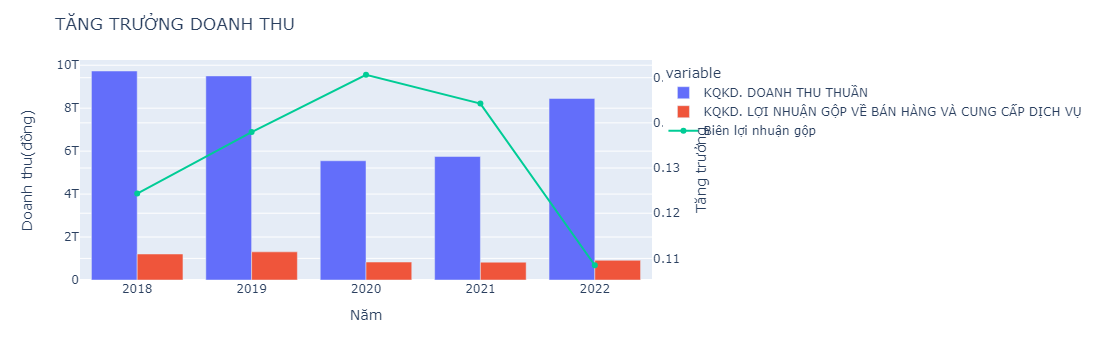

In [37]:
kqkd_all['Biên lợi nhuận gộp'] = kqkd_all['KQKD. LỢI NHUẬN GỘP VỀ BÁN HÀNG VÀ CUNG CẤP DỊCH VỤ']/kqkd_all['KQKD. DOANH THU THUẦN']

# Tạo biểu đồ cột cho CĐKT
fig = px.bar(bctc, x='YEAR', y=['KQKD. DOANH THU THUẦN', 'KQKD. LỢI NHUẬN GỘP VỀ BÁN HÀNG VÀ CUNG CẤP DỊCH VỤ'], barmode='group', labels={'value': 'Số liệu'})

# Thêm đường cho Tăng trưởng tổng tài sản
fig.add_trace(go.Scatter(x=kqkd_all['YEAR'], y=kqkd_all['Biên lợi nhuận gộp'], mode='lines+markers', name ='Biên lợi nhuận gộp', yaxis='y2'))

# Thiết lập trục và tiêu đề
fig.update_layout(
    xaxis=dict(title='Năm'),
    yaxis=dict(title='Doanh thu(đồng)', side='left'),
    yaxis2=dict(title='Tăng trưởng', overlaying='y', side='right'),
    #legend=dict(x=0, y=1, orientation='v', bgcolor='rgba(0,0,0,0)', bordercolor='rgba(0,0,0,0)'),  # Đặt vị trí, màu nền và màu viền cho chú thích
    hovermode='closest',
    title='TĂNG TRƯỞNG DOANH THU'
)

# Hiển thị biểu đồ
fig.show()


1.7 Dòng tiền

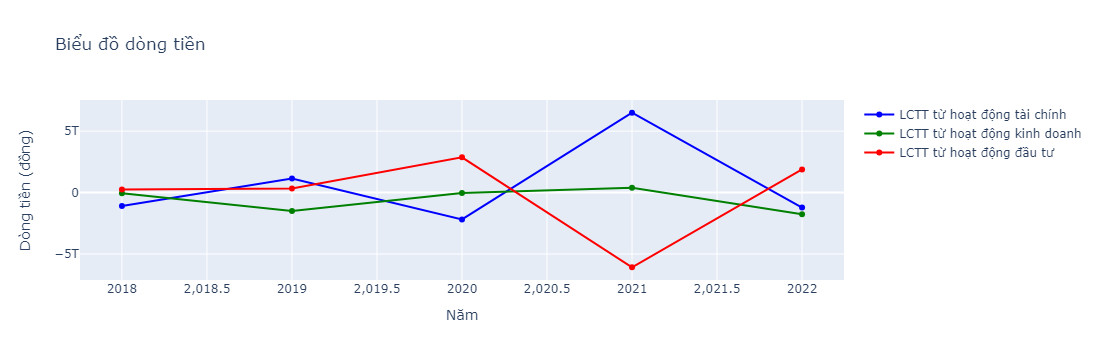

In [38]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=lctt_all['YEAR'], y=lctt_all['LCTT. LƯU CHUYỂN TIỀN TỆ TỪ HOẠT ĐỘNG TÀI CHÍNH (TT)'], name='LCTT từ hoạt động tài chính', line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=lctt_all['YEAR'], y=lctt_all['LCTT. LƯU CHUYỂN TIỀN TỆ RÒNG TỪ CÁC HOẠT ĐỘNG SẢN XUẤT KINH DOANH (TT)'], name='LCTT từ hoạt động kinh doanh', line=dict(color='green', width=2)))
fig.add_trace(go.Scatter(x=lctt_all['YEAR'], y=lctt_all['LCTT. LƯU CHUYỂN TIỀN TỆ RÒNG TỪ HOẠT ĐỘNG ĐẦU TƯ (TT)'], name='LCTT từ hoạt động đầu tư', line=dict(color='red', width=2)))

fig.update_layout(title='Biểu đồ dòng tiền', xaxis=dict(title='Năm'), yaxis=dict(title='Dòng tiền (đồng)')) 

fig.show()

# 2. So sánh trong ngành 

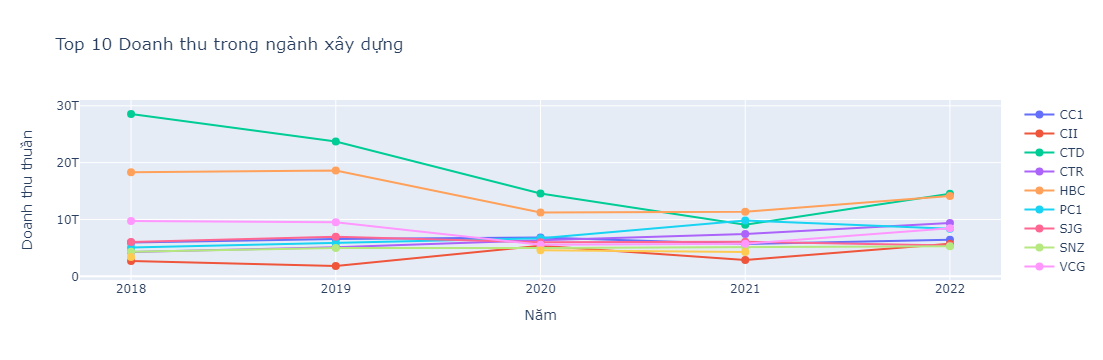

In [39]:
# Tạo biểu đồ tương tác
fig = go.Figure()

# Lặp qua từng cổ phiếu và thêm đường tượng trưng cho mỗi cổ phiếu
for ma, data in nganh_dt.groupby('MÃ'):
    fig.add_trace(go.Scatter(x=data['YEAR'], y=data['KQKD. DOANH THU THUẦN'], mode='lines+markers', name=ma,
                             marker=dict(size=8),
                             hovertemplate='Năm: %{x}<br>Doanh thu thuần: %{y:.2f} tỷ đồng'))

fig.update_layout(title='Top 10 Doanh thu trong ngành xây dựng', 
                  xaxis=dict(title='Năm', tickmode='linear', tickformat='%Y'), 
                  yaxis=dict(title='Doanh thu thuần'))

# Hiển thị biểu đồ
fig.show()

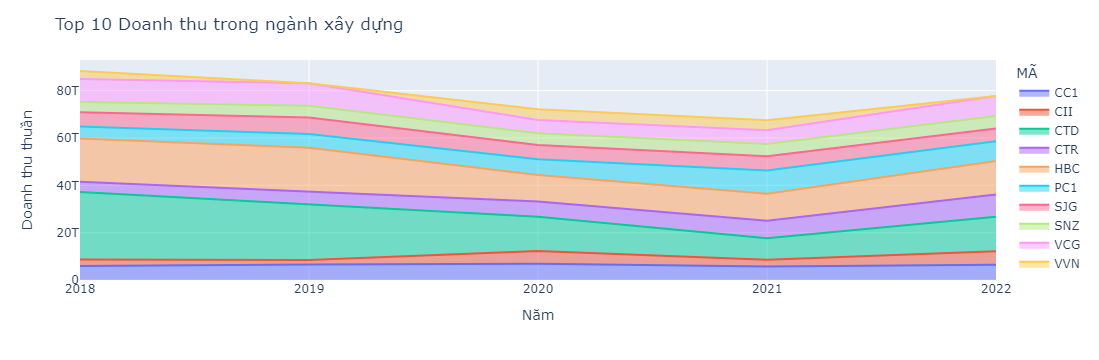

In [40]:
# Vẽ biểu đồ Filled area plot với Plotly Express
fig = px.area(nganh_dt, x='YEAR', y='KQKD. DOANH THU THUẦN', line_group='MÃ', color='MÃ')
# Đặt tiêu đề và nhãn trục
#fig.update_layout(title='Doanh thu của cổ phiếu trong ngành',xaxis_title='Năm',yaxis_title='Doanh thu')

fig.update_layout(title='Top 10 Doanh thu trong ngành xây dựng', 
                  xaxis=dict(title='Năm', tickmode='linear', tickformat='%Y'), 
                  yaxis=dict(title='Doanh thu thuần'))

# Hiển thị biểu đồ
fig.show()

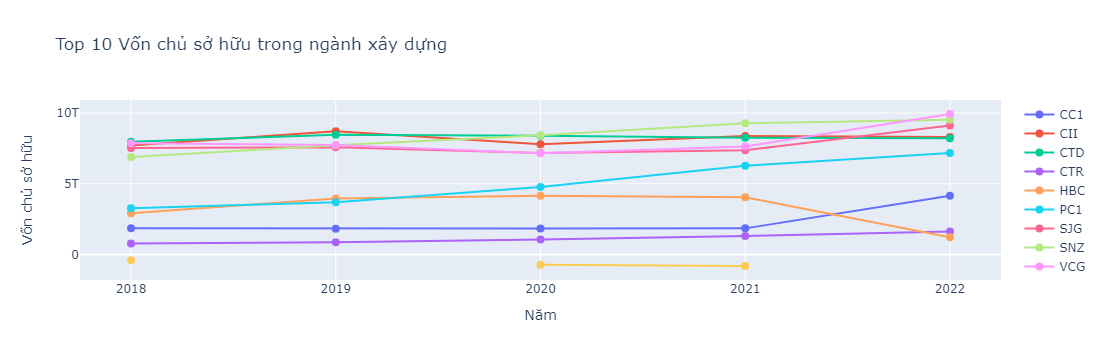

In [41]:
# Tạo biểu đồ tương tác
fig = go.Figure()

# Lặp qua từng cổ phiếu và thêm đường tượng trưng cho mỗi cổ phiếu 
for ma, data in nganh_dt.groupby('MÃ'):
    fig.add_trace(go.Scatter(x=data['YEAR'], y=data['CĐKT. VỐN CHỦ SỞ HỮU'], mode='lines+markers', name=ma,
                             marker=dict(size=8),
                             hovertemplate='Năm: %{x}<br>Vốn chủ sở hữu: %{y:.2f} tỷ đồng'))

fig.update_layout(title='Top 10 Vốn chủ sở hữu trong ngành xây dựng', 
                  xaxis=dict(title='Năm', tickmode='linear', tickformat='%Y'), 
                  yaxis=dict(title='Vốn chủ sở hữu'))

# Hiển thị biểu đồ
fig.show()

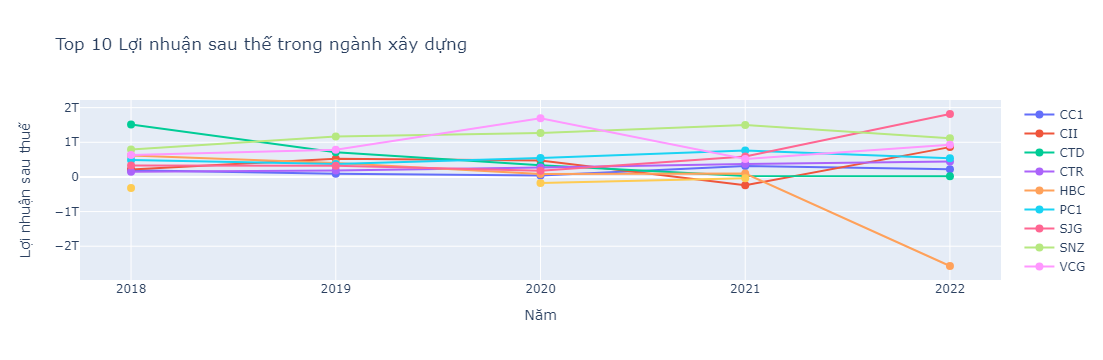

In [42]:
# Tạo biểu đồ tương tác
fig = go.Figure()

# Lặp qua từng cổ phiếu và thêm đường tượng trưng cho mỗi cổ phiếu 
for ma, data in nganh_dt.groupby('MÃ'):
    fig.add_trace(go.Scatter(x=data['YEAR'], y=data['KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP'], mode='lines+markers', name=ma,
                             marker=dict(size=8),
                             hovertemplate='Năm: %{x}<br>Lợi nhuận sau thuế: %{y:.2f} tỷ đồng'))

fig.update_layout(title='Top 10 Lợi nhuận sau thế trong ngành xây dựng', 
                  xaxis=dict(title='Năm', tickmode='linear', tickformat='%Y'), 
                  yaxis=dict(title='Lợi nhuận sau thuế'))

# Hiển thị biểu đồ
fig.show()

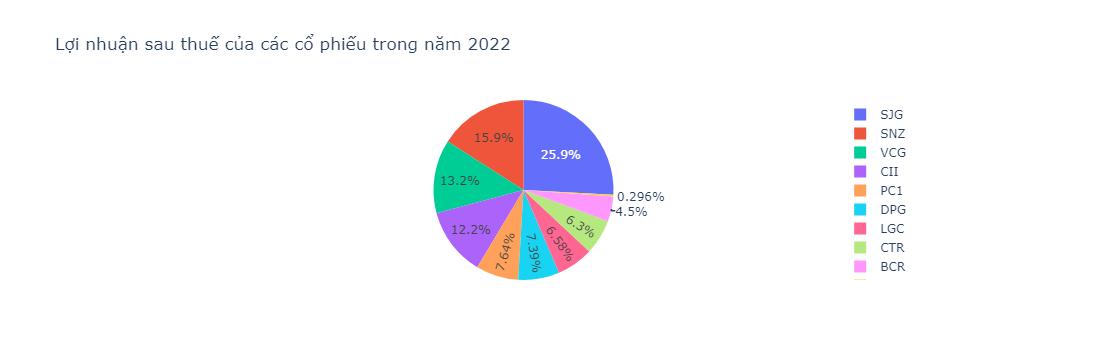

In [43]:
# Lọc ra các mã cổ phiếu cùng với lợi nhuận sau thuế trong năm 2022
loinhuansauthue_2022 = nganh_ln[nganh_ln['YEAR'] == 2022].groupby('MÃ')['KQKD. LỢI NHUẬN SAU THUẾ THU NHẬP DOANH NGHIỆP'].sum()
loinhuansauthue_2022

labels = list(loinhuansauthue_2022.index)
values = list(loinhuansauthue_2022.values)

# Tạo biểu đồ hình tròn
fig = go.Figure(data=[go.Pie(labels=labels, values=values)])


# Cập nhật tiêu đề của biểu đồ
fig.update_layout(title='Lợi nhuận sau thuế của các cổ phiếu trong năm 2022')

# Hiển thị biểu đồ
fig.show()

In [44]:
# Lọc ra các mã cổ phiếu cùng với lợi nhuận sau thuế trong năm 2022
doanhthu_2022 = nganh_dt[nganh_dt['YEAR'] == 2022].groupby('MÃ')['KQKD. DOANH THU THUẦN'].sum().reset_index()


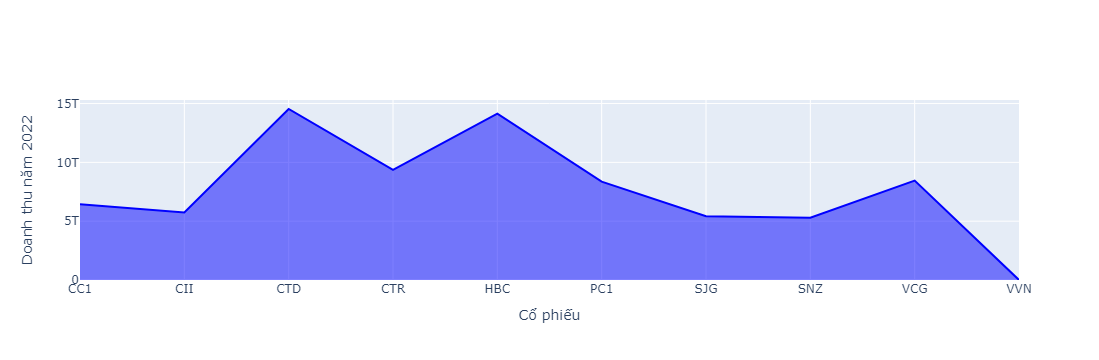

In [45]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(
    x=doanhthu_2022['MÃ'],
    y=doanhthu_2022['KQKD. DOANH THU THUẦN'],
    mode='lines',
    fill='tozeroy',
    line=dict(color='blue')  # Chọn màu sắc cho đường biểu diễn dữ liệu
))

# Đặt tên trục x và trục y
fig.update_layout(
    xaxis_title='Cổ phiếu',
    yaxis_title='Doanh thu năm 2022'
)

# Hiển thị biểu đồ
fig.show()

# 3. PHÂN TÍCH KĨ THUẬT

In [46]:
!pip install pandas_ta

In [47]:
!pip install plotly --upgrade

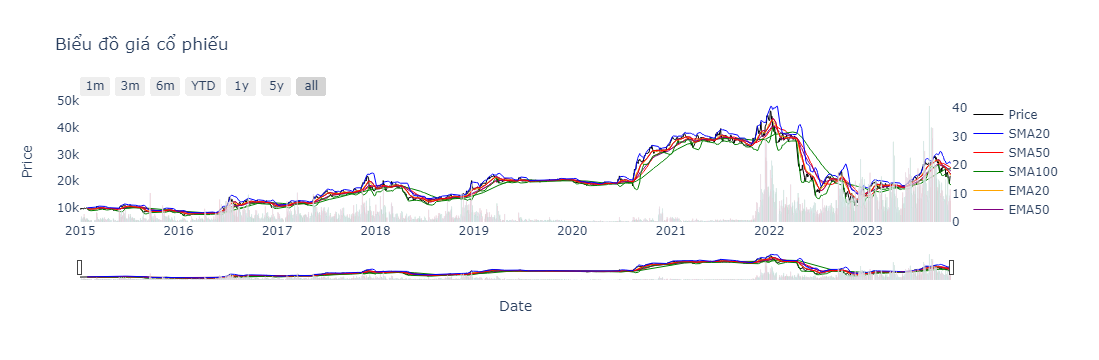

In [48]:
# Tính toán chỉ báo
df1 = cp_gia.copy()  # Tạo một bản sao của DataFrame df

df1['sma_20'] = df1.ta.sma(length=20, append=True)
df1['sma_50'] = df1.ta.sma(length=50, append=True)
df1['sma_100'] = df1.ta.sma(length=100, append=True)
df1['ema_20'] = df1.ta.ema(length=20, append=True)
df1['ema_50'] = df1.ta.ema(length=50, append=True)
df1.ta.bbands(length=20, append=True)

# Tạo biểu đồ
fig = go.Figure()

# Đường giá
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['close'],
    mode='lines',
    name='Price',
    line=dict(color='black', width=1)
))

# Đường SMA20
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['sma_20'],
    mode='lines',
    name='SMA20',
    line=dict(color='blue', width=1)
))

# Đường SMA50
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['sma_50'],
    mode='lines',
    name='SMA50',
    line=dict(color='red', width=1)
))

# Đường SMA100
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['sma_100'],
    mode='lines',
    name='SMA100',
    line=dict(color='green', width=1)
))

# Đường EMA20
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['ema_20'],
    mode='lines',
    name='EMA20',
    line=dict(color='orange', width=1)
))

# Đường EMA50
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['ema_50'],
    mode='lines',
    name='EMA50',
    line=dict(color='purple', width=1)
))

# Dải Bollinger Bands
fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['BBL_20_2.0'],
    mode='lines',
    name='Lower Band',
    line=dict(color='green', width=1)
))

fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['BBM_20_2.0'],
    mode='lines',
    name='Middle Band',
    line=dict(color='red', width=1)
))

fig.add_trace(go.Scatter(
    x=df1['Date'],
    y=df1['BBU_20_2.0'],
    mode='lines',
    name='Upper Band',
    line=dict(color='blue', width=1)
))

# Tùy chỉnh biểu đồ
fig.update_layout(
    title="Biểu đồ giá cổ phiếu",
    xaxis_title='Date',
    yaxis_title='Price',
    showlegend=True,
    plot_bgcolor='white'
)

# Sử dụng màu đỏ khi giá đi xuống và màu xanh khi giá đi lên
colors = ['red' if df1['close'].iloc[i] > df1['close'].iloc[i-1] else 'green' for i in range(1, len(df1))]

fig.add_trace(go.Bar(
    x=df1['Date'].iloc[1:],
    y=df1['volume'].iloc[1:],
    name='Volume',
    yaxis='y2',
    marker=dict(color=colors),
    hovertemplate='</b>: %{y}k'
))

# Tùy chỉnh biểu đồ cho trục y thứ hai
fig.update_layout(yaxis2=dict(overlaying='y', side='right'))

# Thêm thanh trượt thời gian và nút chọn khoảng thời gian
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.update_xaxes(title_text='Date', rangeslider_visible=True, rangeselector=dict(
                    buttons=[
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=3, label="3m", step="month", stepmode="backward"),
                        dict(count=6, label="6m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(count=5, label="5y", step="year", stepmode="backward"),
                        dict(step="all")      
                    ]
                ))

# Hiển thị biểu đồ
fig.show()

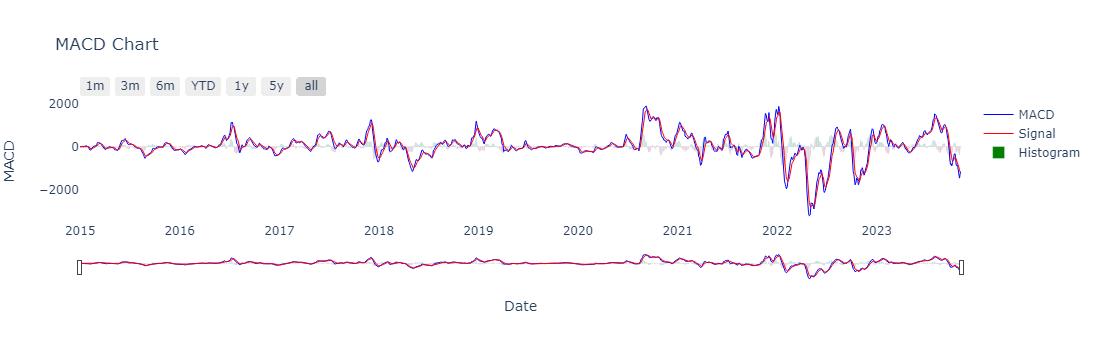

In [49]:
df = cp_gia.copy()

# Tạo biểu đồ
fig = go.Figure()

# Tính toán các giá trị MACD
df['ema_12'] = df['close'].ewm(span=12, adjust=False).mean()
df['ema_26'] = df['close'].ewm(span=26, adjust=False).mean()
df['macd'] = df['ema_12'] - df['ema_26']
df['signal'] = df['macd'].ewm(span=9, adjust=False).mean()
df['histogram'] = df['macd'] - df['signal']

# Đường MACD
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['macd'],
    mode='lines',
    name='MACD',
    line=dict(color='blue', width=1)
))

# Đường tín hiệu (signal)
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=df['signal'],
    mode='lines',
    name='Signal',
    line=dict(color='red', width=1)
))

# Cột histogram
fig.add_trace(go.Bar(
    x=df['Date'],
    y=df['histogram'],
    name='Histogram',
    marker=dict(
        color=df['histogram'],
        colorscale=[[0, 'red'], [0.5, 'red'], [0.5, 'green'], [1, 'green']],
        cmin=-max(abs(df['histogram'])),
        cmax=max(abs(df['histogram'])),
        showscale=False
    )
))

# Tùy chỉnh biểu đồ
fig.update_layout(
    title="MACD Chart",
    xaxis_title='Date',
    yaxis_title='MACD',
    showlegend=True,plot_bgcolor='white' 
)

# Thêm thanh trượt thời gian và nút chọn khoảng thời gian
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.update_xaxes(title_text='Date', rangeslider_visible=True, rangeselector=dict(
                    buttons=[
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=3, label="3m", step="month", stepmode="backward"),
                        dict(count=6, label="6m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(count=5, label="5y", step="year", stepmode="backward"),
                        dict(step="all")      
                    ]
                ))
# Hiển thị biểu đồ
fig.show()

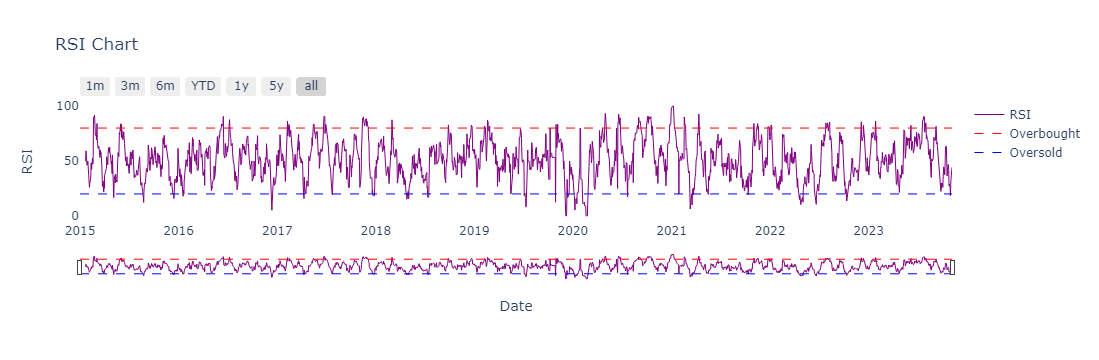

In [50]:
# Tính toán giá trị RSI
def calculate_rsi(data, window=14):
    delta = data.diff()
    up = delta.mask(delta < 0, 0)
    down = -delta.mask(delta > 0, 0)

    avg_gain = up.rolling(window).mean()
    avg_loss = down.rolling(window).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Tạo biểu đồ
fig = go.Figure()

# Tính toán và thêm đường RSI vào biểu đồ
rsi = calculate_rsi(df['close'])
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=rsi,
    mode='lines',
    name='RSI',
    line=dict(color='purple', width=1)
))

# Thêm đường ngưỡng bán (Y=80)
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=[80] * len(df),  # Tạo một danh sách có cùng chiều dài với df, đều là giá trị 80
    mode='lines',
    name='Overbought',
    line=dict(color='red', width=1, dash='dash')  # Sử dụng dash='dash' để đường là đứt
))

# Thêm đường ngưỡng mua (Y=20)
fig.add_trace(go.Scatter(
    x=df['Date'],
    y=[20] * len(df),  # Tạo một danh sách có cùng chiều dài với df, đều là giá trị 20
    mode='lines',
    name='Oversold',
    line=dict(color='blue', width=1, dash='dash')  # Sử dụng dash='dash' để đường là đứt
))

# Tùy chỉnh biểu đồ
fig.update_layout(
    title="RSI Chart",
    xaxis_title='Date',
    yaxis_title='RSI',
    showlegend=True,
    plot_bgcolor='white'
)
# Thêm thanh trượt thời gian và nút chọn khoảng thời gian
fig.update_layout(xaxis=dict(rangeslider=dict(visible=True)))
fig.update_xaxes(title_text='Date', rangeslider_visible=True, rangeselector=dict(
                    buttons=[
                        dict(count=1, label="1m", step="month", stepmode="backward"),
                        dict(count=3, label="3m", step="month", stepmode="backward"),
                        dict(count=6, label="6m", step="month", stepmode="backward"),
                        dict(count=1, label="YTD", step="year", stepmode="todate"),
                        dict(count=1, label="1y", step="year", stepmode="backward"),
                        dict(count=5, label="5y", step="year", stepmode="backward"),
                        dict(step="all")      
                    ]
                ))

# Hiển thị biểu đồ
fig.show()